In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
mlp_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

mlp_history = mlp_model.fit(x_train, y_train,
                            epochs=8,
                            batch_size=128,
                            validation_split=0.2,
                            verbose=1)

Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8176 - loss: 0.6462 - val_accuracy: 0.9492 - val_loss: 0.1755
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9538 - loss: 0.1584 - val_accuracy: 0.9643 - val_loss: 0.1278
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9684 - loss: 0.1058 - val_accuracy: 0.9638 - val_loss: 0.1178
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9765 - loss: 0.0808 - val_accuracy: 0.9678 - val_loss: 0.1069
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9823 - loss: 0.0570 - val_accuracy: 0.9742 - val_loss: 0.0898
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9865 - loss: 0.0453 - val_accuracy: 0.9727 - val_loss: 0.0971
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9896 - loss: 0.0349 - val_accuracy: 0.9744 - val_loss: 0.0900
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 0.9754 - 

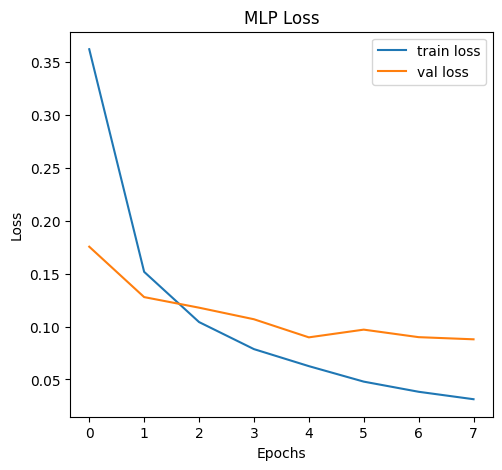

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='train loss')
plt.plot(mlp_history.history['val_loss'], label='val loss')
plt.title('MLP Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

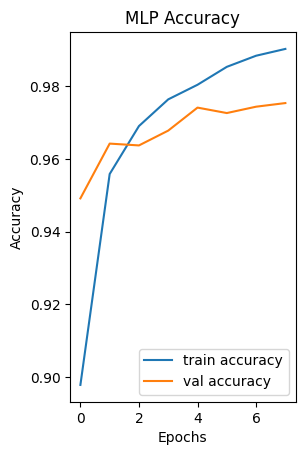

In [6]:
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='train accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='val accuracy')
plt.title('MLP Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [7]:
mlp_eval = mlp_model.evaluate(x_test, y_test, verbose=0)
print(f'MLP Test Accuracy: {mlp_eval[1] * 100:.2f}%')

MLP Test Accuracy: 97.64%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


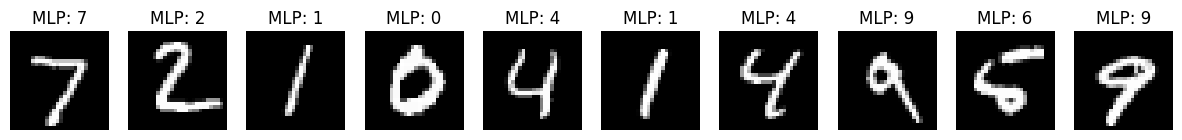

In [8]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'MLP: {np.argmax(mlp_model.predict(x_test[i:i+1]))}')
    plt.axis('off')
plt.show()

In [17]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train, y_train, epochs=8, batch_size=128,
                             validation_split=0.2, verbose=1)

Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.7935 - loss: 0.6761 - val_accuracy: 0.9748 - val_loss: 0.0854
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.9677 - loss: 0.1049 - val_accuracy: 0.9816 - val_loss: 0.0585
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.9784 - loss: 0.0709 - val_accuracy: 0.9837 - val_loss: 0.0563
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.9821 - loss: 0.0571 - val_accuracy: 0.9836 - val_loss: 0.0533
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.9836 - loss: 0.0523 - val_accuracy: 0.9879 - val_loss: 0.0421
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9877 - loss: 0.0406 - val_accuracy: 0.9868 - val_loss: 0.0431
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9882 - val_loss: 0.0409
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.9903 - loss: 0.0309 - val_a

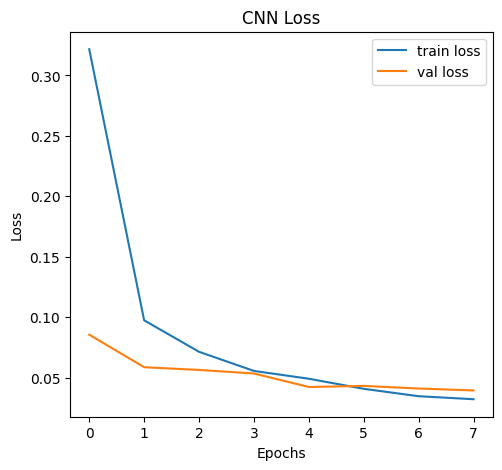

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

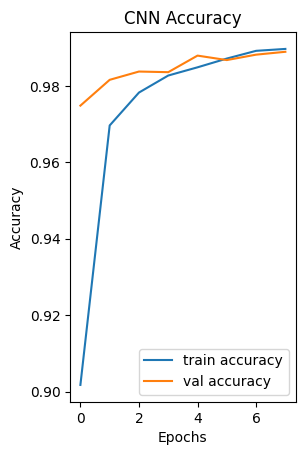

In [21]:
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='train accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
cnn_eval = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_eval[1] * 100:.2f}%')

CNN Test Accuracy: 99.04%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


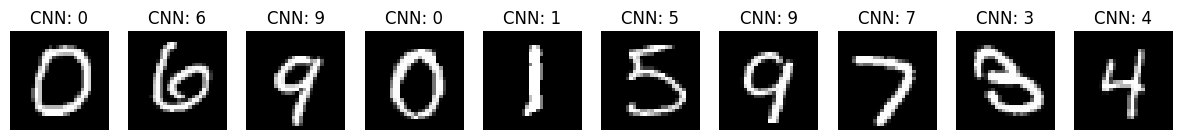

In [23]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[10 + i].reshape(28, 28), cmap='gray')
    plt.title(f'CNN: {np.argmax(cnn_model.predict(x_test[10 + i:10 + i + 1]))}')
    plt.axis('off')
plt.show()